In [0]:
# Omkar S Deorukhkar
from nsepy import get_history
from datetime import date
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import SimpleImputer
from keras.models import Sequential
from keras.layers import LSTM, Dense
from keras.layers.core import Dense, Activation, Dropout
import matplotlib.pyplot as plt


# Getting Historical Data

data = get_history(symbol='TCS',start=date(2018,2,2), end=date(2019,2,2))
data = pd.DataFrame(data = data)
data.reset_index(drop=True, inplace=True)
df = data[['Prev Close','Close']]
df = df[:240]

#--------------------------------------------------------------------------------------

# Preprocessing & Scaling

df = np.asarray(df)
df = df.astype('float32')

imputer = SimpleImputer(missing_values = np.nan, strategy = 'mean')
imputer.fit(df)
df = imputer.transform(df)



X, Y = df[:,0:1], df[:,1:2]


scaler = MinMaxScaler(feature_range=(0,1))
X = scaler.fit_transform(X)
Y = scaler.fit_transform(Y)

X_train, X_test,Y_train, Y_test = train_test_split(X,Y,test_size=0.2, shuffle=False)

#X_train = X_train.reshape(X_train.shape[1],X_train.shape[0],1)
#X_test = X_test.reshape(X_test.shape[1],X_test.shape[0],1)


X_train = np.reshape(X_train, (X_train.shape[0],1,X_train.shape[1]))
X_test = np.reshape(X_test, (X_test.shape[0],1,X_test.shape[1]))



#---------------------------------------------------------------------------------------

#Building the LSTM Model

model = Sequential()
model.add(LSTM(25, input_shape=(1,1),return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(25,return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(25,return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(1))
model.add(Activation('linear'))
model.compile(loss='mean_squared_error',optimizer='adam', metrics=['mean_squared_error'])
model.fit(X_train, Y_train, epochs=200, shuffle=False)

#---------------------------------------------------------------------------------------




Epoch 1/200
192/192 [==============================] - 8s 43ms/step - loss: 0.2581 - mean_squared_error: 0.2581
Epoch 2/200
192/192 [==============================] - 0s 217us/step - loss: 0.2465 - mean_squared_error: 0.2465
Epoch 3/200
192/192 [==============================] - 0s 219us/step - loss: 0.2361 - mean_squared_error: 0.2361
Epoch 4/200
192/192 [==============================] - 0s 224us/step - loss: 0.2257 - mean_squared_error: 0.2257
Epoch 5/200
192/192 [==============================] - 0s 230us/step - loss: 0.2153 - mean_squared_error: 0.2153
Epoch 6/200
192/192 [==============================] - 0s 231us/step - loss: 0.2038 - mean_squared_error: 0.2038
Epoch 7/200
192/192 [==============================] - 0s 227us/step - loss: 0.1930 - mean_squared_error: 0.1930
Epoch 8/200
192/192 [==============================] - 0s 234us/step - loss: 0.1796 - mean_squared_error: 0.1796
Epoch 9/200
192/192 [==============================] - 0s 227us/step - loss: 0.1656 - mean_square

Training Set Error (Mean) :  [2.9991176] %


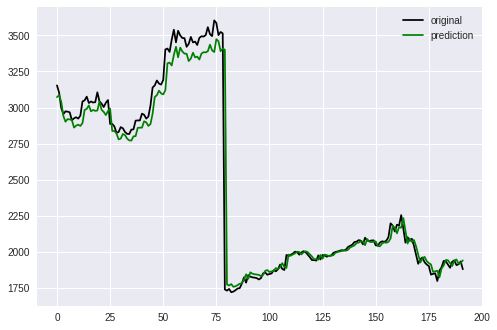

In [0]:


# Fit And Predict

Train_pred = model.predict(X_train)
Train_pred = (scaler.inverse_transform(Train_pred))
actual = (scaler.inverse_transform(Y_train))


err = abs(Train_pred-actual).mean()
err = err/actual[len(actual)-1]

 
 
print("Training Set Error (Mean) : ",err*100,"%")

plt.plot(actual, color="black", label="original")
plt.plot(Train_pred,color="green",label="prediction")
plt.legend()
plt.show()

Testing Set Error (Mean) :  [2.9991176] %


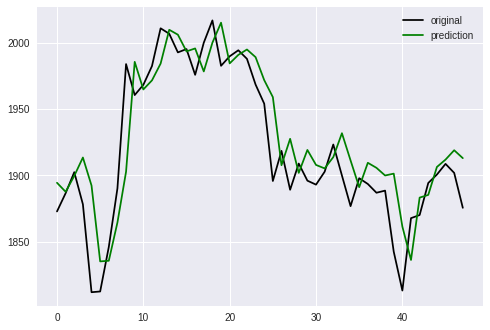

In [0]:
#Fit And Predict

Test_pred = model.predict(X_test)
Test_pred = (scaler.inverse_transform(Test_pred))
actualx = (scaler.inverse_transform(Y_test))


errx = abs(Test_pred-actualx).mean()
errx = errx/actual[len(actualx)-1]

 
 
print("Testing Set Error (Mean) : ",err*100,"%")

plt.plot(actualx, color="black", label="original")
plt.plot(Test_pred,color="green",label="prediction")
plt.legend()
plt.show()




In [0]:
def Predict_Single(X):
  X = np.asarray(X)
  X = X.astype('float32')
  X = scaler.fit_transform(X)
  X = np.reshape(X, (X.shape[0],1,X.shape[1]))
  pred = model.predict(X)
  return scaler.inverse_transform(pred)

X = [[2014]]

print('Prediction : ', Predict_Single(X))
  
  
  

Prediction :  [[2014.0199]]
